# Motivation: Beyond Periodic Signals
In your previous lessons, you encountered the **complex exponential Fourier series**, which expresses a **periodic** signal $x(t)$ (with period $T$) as an infinite sum of complex exponentials: $x(t) = \sum_{k=-\infty}^{\infty} D_k e^{j k \omega_0 t}$, where $\omega_0 = \frac{2\pi}{T}$.  

This works beautifully for signals that repeat every $T$. However, **real-world signals** are often:
- **Aperiodic** (they do not repeat).
- **Finite in duration** (they start and stop rather than go on forever).

We still want to describe these aperiodic signals in terms of frequency components, but the “discrete set” of harmonics at multiples of $\omega_0$ no longer makes sense if there is no repeating period. That’s where the **Fourier Transform** comes in.

# Bridging from Fourier Series to the Fourier Transform
Conceptually, the **Fourier Transform** arises from the Fourier Series when we let the period $T$ grow to infinity. Suppose we try to model an aperiodic signal $x(t)$ by “pretending” it is periodic with some large period $T$. Then:

- **Fundamental Frequency $\omega_0$ Becomes Very Small**  
  Since $\omega_0 = \frac{2\pi}{T}$, as $T \to \infty$, $\omega_0 \to 0$. The spacing between adjacent harmonics becomes infinitesimally small.
- **Discrete Coefficients $D_k$ Merge into a Continuous Spectrum**  
  Instead of having $D_k$ only at discrete integer $k$, we get a **continuous function** $X(\omega)$. This function $X(\omega)$ tells us how much of each angular frequency $\omega$ is present.

Hence, the Fourier Transform is like “the limit of the Fourier Series” as $T \to \infty$.

# The Continuous-Time Fourier Transform (CTFT)
For an aperiodic signal $x(t)$ defined for all real $t$, its **Fourier Transform** $X(\omega)$ is:  
$X(\omega) = \int_{-\infty}^{\infty} x(t) e^{-\,j\,\omega\,t} \, dt.$

This integral “projects” $x(t)$ onto a continuous spectrum of exponentials $e^{-\,j\,\omega\,t}$ at every $\omega$.  
- $X(\omega)$ is generally a complex-valued function.
- The **magnitude** $|X(\omega)|$ tells you how strongly $x(t)$ contains the frequency $\omega$.
- The **phase** $\angle X(\omega)$ tells you how that frequency component is shifted in time.

# The Inverse Transform
To reconstruct $x(t)$ from $X(\omega)$, use the **Inverse Fourier Transform**:  
$x(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} X(\omega)\, e^{j\,\omega\,t} \, d\omega.$

Just like the Fourier Series has an inverse summation, the Fourier Transform has an inverse integral.


# Fourier Transforms: Understanding Frequency Domain Analysis

In this notebook, we'll explore how complex signals can be broken down into their frequency components. We'll also introduce Fourier transforms as a powerful mathematical tool that allows us to convert signals from the time domain to the frequency domain, enabling analysis of both periodic and non-periodic signals.



# Biological Analogy: The Human Ear as a Frequency Analyzer

Our ears break down incoming sound waves into different frequency components along the **basilar membrane**. Certain parts of the membrane vibrate more at certain frequencies—similar to how a Fourier Series would represent a periodic signal with distinct frequency components.

- **Tonotopic organization**: Different locations in the cochlea respond to different frequencies.
- **Frequency range**: Humans typically hear from about 20 Hz up to about 20 kHz.
- This is a real-world confirmation that analyzing signals by frequency (amplitude + phase) is not just a math trick—it’s how nature (and our auditory system) works!


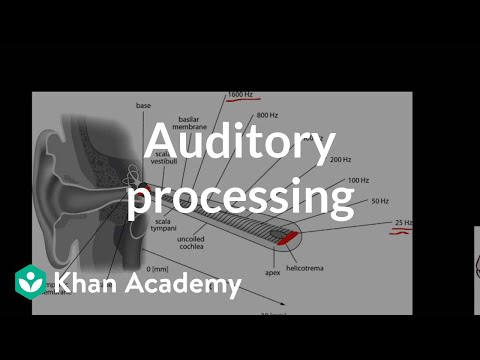

In [2]:
from IPython.display import YouTubeVideo 


video = YouTubeVideo("peSLM4XObBE") 

display(video) 


### Human Auditory Signal Processing

- Our auditory system performs a **frequency analysis** of the incoming sound waves.
- The **tonotopic organization** of the basilar membrane decomposes the sound signal into its constituent frequency components.
- This process is very reminiscent of what the **Fourier Series** does, right?
  - However, the Fourier Series typically represents periodic functions.
- But are all the sounds we hear periodic like the ones the Fourier Series is representing?
  - Not really....

**Conclusion**: While our auditory pathway conceptually mirrors mathematical tools like the Fourier Series, real-world sounds often exhibit non-periodic characteristics, which are still effectively analyzed by our auditory system.


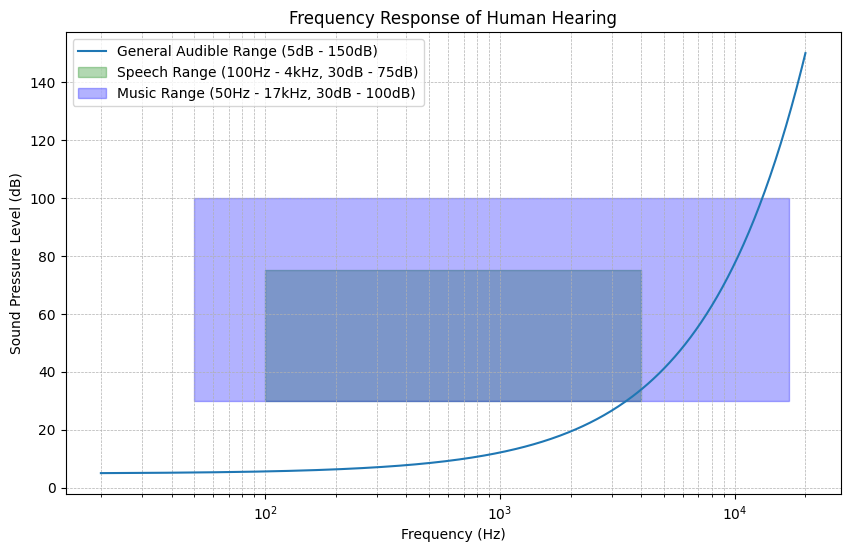

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle  # Ensure this import is included
import numpy as np
from IPython.display import display, Markdown

markdown_text = """
### Human Auditory Signal Processing

- Our auditory system performs a **frequency analysis** of the incoming sound waves.
- The **tonotopic organization** of the basilar membrane decomposes the sound signal into its constituent frequency components.
- This process is very reminiscent of what the **Fourier Series** does, right?
  - However, the Fourier Series typically represents periodic functions.
- But are all the sounds we hear periodic like the ones the Fourier Series is representing?
  - Not really....

**Conclusion**: While our auditory pathway conceptually mirrors mathematical tools like the Fourier Series, real-world sounds often exhibit non-periodic characteristics, which are still effectively analyzed by our auditory system.
"""
display(Markdown(markdown_text))

def plot_frequency_response():
    # Frequencies in Hz (log scale for better visualization)
    frequencies = np.logspace(np.log10(20), np.log10(20000), 400)
    
    # Simulate some normalized pressure levels
    pressures = np.interp(frequencies, [20, 20000], [5, 150])  # Simulated pressure level curve

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.semilogx(frequencies, pressures, label='General Audible Range (5dB - 150dB)')
    ax.add_patch(Rectangle((100, 30), 3900, 45, color='green', alpha=0.3, label='Speech Range (100Hz - 4kHz, 30dB - 75dB)'))
    ax.add_patch(Rectangle((50, 30), 16950, 70, color='blue', alpha=0.3, label='Music Range (50Hz - 17kHz, 30dB - 100dB)'))

    # Labels & Title
    ax.set_title('Frequency Response of Human Hearing')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Sound Pressure Level (dB)')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend()

    plt.show()

plot_frequency_response()

In [8]:
%matplotlib inline
import numpy as np
from IPython.display import display, Audio, Markdown
import ipywidgets as widgets

def play_sound(frequency):
    sample_rate = 44100
    duration = 1.0
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    audio = np.sin(2 * np.pi * frequency * t)
    return Audio(audio, rate=sample_rate, autoplay=True)

frequency_slider = widgets.IntSlider(min=20, max=20000, value=2000, description='Frequency (Hz)')
play_button = widgets.Button(description="Play Sound")

def on_button_clicked(_):
    display(play_sound(frequency_slider.value))

play_button.on_click(on_button_clicked)

display(frequency_slider, play_button)
display(Markdown("### Let's see how much you can hear!"))
display(Markdown("Move the slider to select a frequency (from 20 Hz to 20 kHz) and then click 'Play Sound' to listen."))

IntSlider(value=2000, description='Frequency (Hz)', max=20000, min=20)

Button(description='Play Sound', style=ButtonStyle())

### Let's see how much you can hear!

Move the slider to select a frequency (from 20 Hz to 20 kHz) and then click 'Play Sound' to listen.

# Brain Wave Frequency Ranges

Brain activity can be measured using electroencephalography (EEG), which detects electrical signals produced by the brain. These signals can be analyzed in terms of their frequency components, revealing different types of brain waves:

1. **Delta waves (0.5-4 Hz)**:
   - Associated with deep sleep and unconsciousness
   - Dominant during healing and regeneration

2. **Theta waves (4-8 Hz)**:
   - Present during drowsiness, meditation, and light sleep
   - Associated with creativity and deep relaxation

3. **Alpha waves (8-13 Hz)**:
   - Dominant during relaxed wakefulness with closed eyes
   - Indicate a calm, alert state of consciousness

4. **Beta waves (13-30 Hz)**:
   - Present during normal waking consciousness and active thinking
   - Associated with focus, problem-solving, and active concentration

5. **Gamma waves (30-100+ Hz)**:
   - Linked to higher cognitive functions and information processing
   - Associated with peak concentration and cognitive performance

These frequency ranges demonstrate how the brain, like our auditory system, processes information in terms of frequency components.


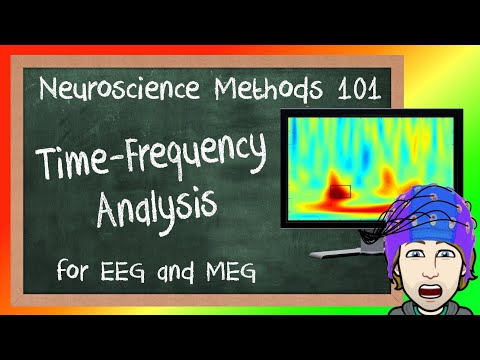

In [5]:
from IPython.display import YouTubeVideo 


# Video showing EEG frequency signals and brain wave patterns
video = YouTubeVideo("FIqvTUOGFOE") 

display(video) 

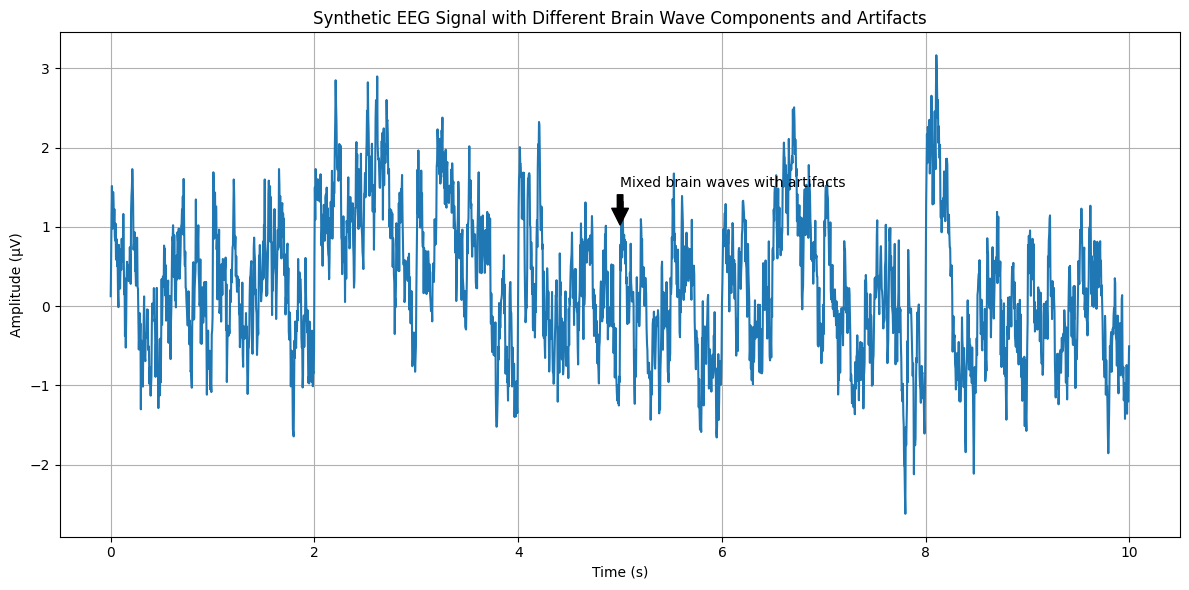

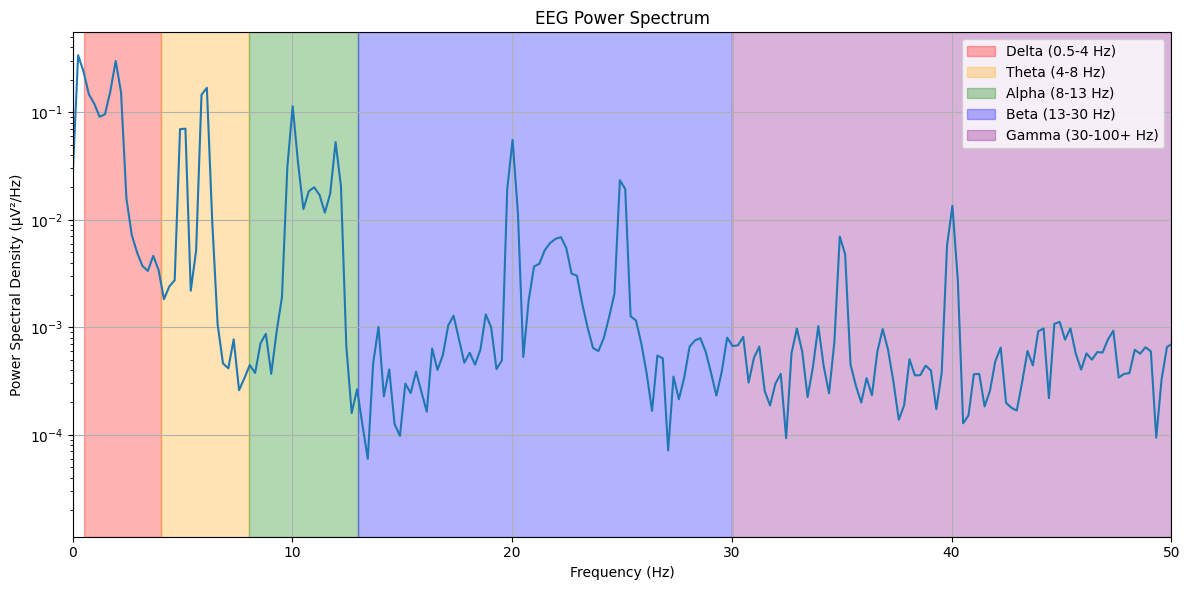

This synthetic EEG data demonstrates the different frequency components that make up brain activity, including common artifacts and noise found in real EEG recordings.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

# Create a synthetic EEG dataset with different frequency bands
np.random.seed(42)  # For reproducibility
fs = 250  # Sampling frequency (Hz)
t = np.arange(0, 10, 1/fs)  # 10 seconds of data

# Generate different brain wave components
delta = 0.5 * np.sin(2 * np.pi * 2 * t) + 0.3 * np.sin(2 * np.pi * 1.5 * t)  # Delta waves
theta = 0.4 * np.sin(2 * np.pi * 6 * t) + 0.25 * np.sin(2 * np.pi * 5 * t)  # Theta waves
alpha = 0.3 * np.sin(2 * np.pi * 10 * t) + 0.2 * np.sin(2 * np.pi * 12 * t)  # Alpha waves
beta = 0.2 * np.sin(2 * np.pi * 20 * t) + 0.15 * np.sin(2 * np.pi * 25 * t)  # Beta waves
gamma = 0.1 * np.sin(2 * np.pi * 40 * t) + 0.08 * np.sin(2 * np.pi * 35 * t)  # Gamma waves

# Add some non-stationary components (bursts of activity)
burst_locations = [1.5, 4.2, 7.8]
for loc in burst_locations:
    burst_mask = np.exp(-0.5 * ((t - loc) / 0.2) ** 2)  # Gaussian envelope
    alpha_burst = 0.6 * np.sin(2 * np.pi * 11 * t) * burst_mask
    beta_burst = 0.4 * np.sin(2 * np.pi * 22 * t) * burst_mask
    theta += alpha_burst
    beta += beta_burst

# Add artifacts (eye blinks, muscle movements)
blink_locations = [2.5, 6.7]
for loc in blink_locations:
    blink = 1.5 * np.exp(-10 * (t - loc) ** 2)  # Simulate eye blink
    delta += blink

# Add occasional high-amplitude spikes (muscle artifacts)
spike_locations = [3.3, 8.1]
for loc in spike_locations:
    spike = 2.0 * np.exp(-100 * (t - loc) ** 2)  # Sharp spike
    gamma += spike

# Combine all waves and add more noise
eeg_signal = delta + theta + alpha + beta + gamma + 0.25 * np.random.randn(len(t))

# Add some baseline drift
baseline_drift = 0.3 * np.sin(2 * np.pi * 0.1 * t)
eeg_signal += baseline_drift

# Create a DataFrame to store the data
eeg_df = pd.DataFrame({
    'Time': t,
    'EEG': eeg_signal
})

# Plot the EEG signal
plt.figure(figsize=(12, 6))
plt.plot(eeg_df['Time'], eeg_df['EEG'])
plt.title('Synthetic EEG Signal with Different Brain Wave Components and Artifacts')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')
plt.grid(True)

# Add annotations for different wave types
plt.annotate('Mixed brain waves with artifacts', 
             xy=(5, 1), 
             xytext=(5, 1.5), 
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()

# Calculate and plot the power spectrum
f, Pxx = signal.welch(eeg_signal, fs, nperseg=1024)
plt.figure(figsize=(12, 6))
plt.semilogy(f, Pxx)
plt.title('EEG Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (μV²/Hz)')
plt.grid(True)

# Add annotations for different frequency bands
plt.axvspan(0.5, 4, alpha=0.3, color='red', label='Delta (0.5-4 Hz)')
plt.axvspan(4, 8, alpha=0.3, color='orange', label='Theta (4-8 Hz)')
plt.axvspan(8, 13, alpha=0.3, color='green', label='Alpha (8-13 Hz)')
plt.axvspan(13, 30, alpha=0.3, color='blue', label='Beta (13-30 Hz)')
plt.axvspan(30, 50, alpha=0.3, color='purple', label='Gamma (30-100+ Hz)')

plt.legend()
plt.xlim(0, 50)
plt.tight_layout()
plt.show()

print("This synthetic EEG data demonstrates the different frequency components that make up brain activity, including common artifacts and noise found in real EEG recordings.")


# THE FOURIER TRANSFORM

So far we have discussed many ways to represent a periodic wave function with both trigonometric and exponential terms. 
Here is some review

## The trignometric form of the  Fourier series:

$$
f(x) = a_0 + \sum_{n=1}^{\infty} \left( a_n \cos(nx) + b_n \sin(nx) \right)
$$

where

$$
a_0 = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x) \, dx,
$$

$$
a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos(nx) \, dx \quad \text{for } n \geq 1,
$$

$$
b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin(nx) \, dx \quad \text{for } n \geq 1.
$$

## The exponential form of the Fourier series:

$$
f(x) = \sum_{n=-\infty}^{\infty} c_n e^{inx}
$$

where the Fourier coefficients $c_n$ are given by:

$$
c_n = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x) e^{-inx} \, dx
$$

# Bridging from Fourier Series to the Fourier Transform

Conceptually, the **Fourier Transform** arises from the Fourier Series when we let the period $ T $ grow to infinity. In other words, suppose we try to model an aperiodic signal $ x(t) $ by “pretending” it is periodic with some very large period $ T $. Then:

### - **Fundamental Frequency $\omega_0$ Becomes Very Small**  
  Because $\omega_0 = \tfrac{2\pi}{T}$, as $T \to \infty$, $\omega_0 \to 0$. The spacing between adjacent harmonics becomes infinitesimally small.

- **Discrete Coefficients $ D_k $ Merge into a Continuous Spectrum**  
  Instead of having $ D_k $ only at discrete $ k $-values, we get a **continuous function** $ X(\omega) $. This function $ X(\omega) $ tells us how much of each **angular frequency** $ \omega $ is present in the aperiodic signal.

Hence, the Fourier Transform is like **“the limit of the Fourier Series”** as the period becomes infinitely large.


## The Fourier Transform: Bridging from Periodic to Non-Periodic Signals

### From Fourier Series to Fourier Transform

The Fourier Series works wonderfully for periodic functions, but what about signals that don't repeat? Think about a single spoken word or a musical note that fades away - these aren't periodic in the strict sense.

The Fourier Transform elegantly extends the concept of Fourier Series to non-periodic functions. It's one of the most powerful mathematical tools in signal processing, physics, and engineering.

### Intuitive Understanding

Imagine you have a complex musical piece. The Fourier Transform acts like a mathematical ear that can:
- Identify every frequency present in the music
- Tell you how strong each frequency component is
- Reveal phase relationships between components

In other words, it decomposes any signal into its fundamental frequency building blocks.

### Mathematical Definition

For a function $f(t)$ (where $t$ typically represents time), its Fourier Transform $F(\omega)$ is defined as:

$$
F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i\omega t} \, dt
$$

Here, $\omega$ represents angular frequency (in radians per second), and $F(\omega)$ tells us how much of each frequency component exists in our original signal.

The Inverse Fourier Transform allows us to reconstruct our original signal from its frequency components:

$$
f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{i\omega t} \, d\omega
$$

### Domain Transformation

The Fourier Transform converts a signal from the:
- **Time domain** (how the signal varies over time)
- To the **frequency domain** (which frequencies are present and their relative strengths)

This transformation reveals hidden patterns and structures that might not be obvious in the original signal. For example, a noisy recording might show clear frequency peaks in its Fourier Transform, revealing the fundamental tones.

### Connection to Fourier Series

As the period of a function approaches infinity, the discrete frequency components in a Fourier Series become continuously distributed, leading naturally to the Fourier Transform. This is why the Fourier Transform can be viewed as the limit of the Fourier Series as the period approaches infinity.



# From “Lines” in the Spectrum to a “Smooth Curve”
- With **Fourier Series** for periodic $x(t)$, we only look at frequencies $\omega = k\,\omega_0$. Plotting $|D_k|$ vs. $k$ gives a **discrete “line” spectrum**.
- With the **Fourier Transform** for aperiodic $x(t)$, all real $\omega$ are possible. So $X(\omega)$ is a **continuous function** over $-\infty \le \omega \le \infty$.

# Practical Considerations
- **Discrete-Time / Digital**: In practice, you often use the **FFT** (Fast Fourier Transform) on sampled signals. This is a discrete approximation to the continuous transform.
- **Real-World Example**: The **human auditory system** effectively performs a frequency decomposition on incoming sounds. This shows how frequency domain ideas are natural in math and nature alike.


# Example: Gaussian Pulse
A classic example is a **Gaussian pulse**: $x(t) = e^{-\alpha t^2}$ (for $\alpha > 0$), which does not repeat. Its Fourier Transform is another Gaussian (up to constants): $X(\omega) \sim e^{-\frac{\omega^2}{4\alpha}}$. When a signal is localized in time like a Gaussian “hump,” its frequency spectrum is also localized but spread differently—no discrete lines, just a smooth bell-shaped curve.




## Gaussian Pulse Example

The Gaussian pulse is defined as $x(t) = e^{-\alpha t^2}$ where $\alpha > 0$ controls the width of the pulse:
- Larger $\alpha$ values create a narrower pulse in time domain
- Smaller $\alpha$ values create a wider pulse in time domain

The Fourier Transform of a Gaussian pulse is also a Gaussian function:
$X(\omega) = \sqrt{\frac{\pi}{\alpha}} e^{-\frac{\omega^2}{4\alpha}}$

This demonstrates an important property: 
- When a signal is narrow in time domain, it is wide in frequency domain
- When a signal is wide in time domain, it is narrow in frequency domain

This is a manifestation of the **uncertainty principle** in signal processing.

The figure above shows three examples with different $\alpha$ values (0.5, 1.0, and 2.0) 
so you can see the effect without needing to adjust the slider.


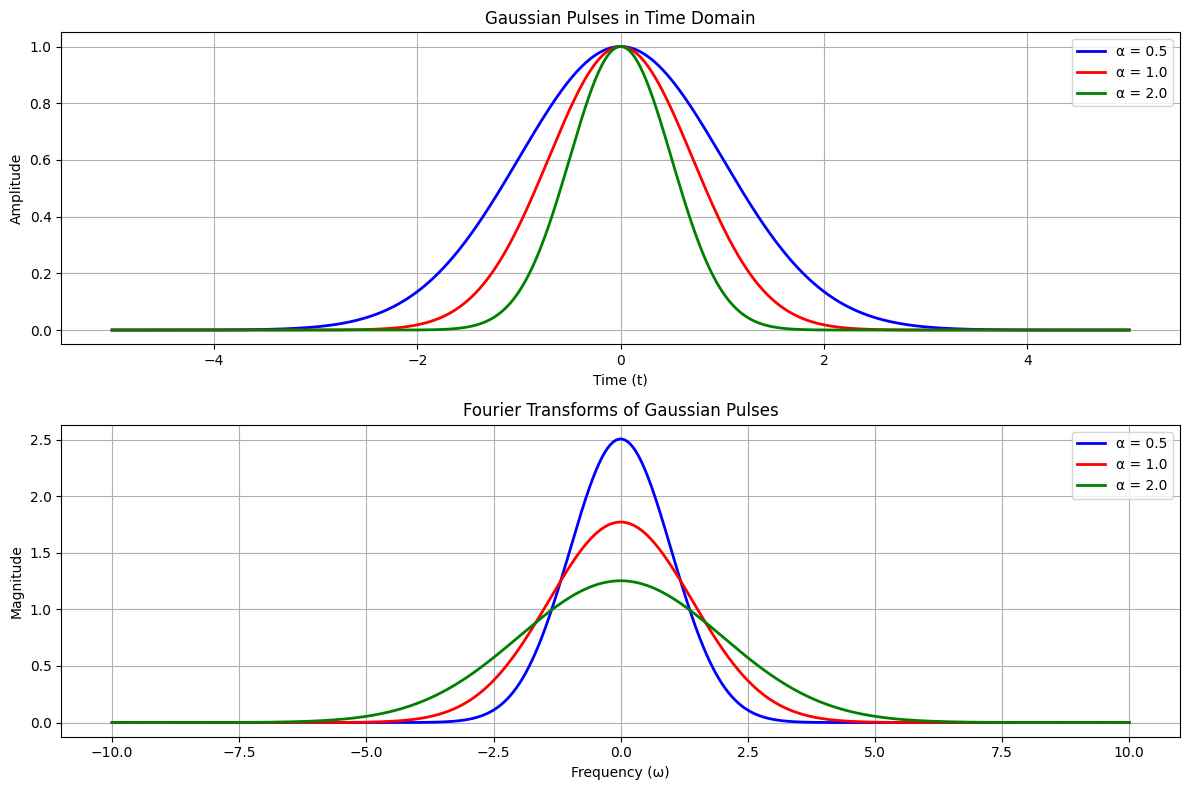

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from IPython.display import Markdown, display
from ipywidgets import VBox, HBox, FloatSlider, Output

# Define time domain
t = np.linspace(-5, 5, 1000)
omega = np.linspace(-10, 10, 1000)

# Function to create a Gaussian pulse
def gaussian_pulse(t, alpha=1.0):
    return np.exp(-alpha * t**2)

# Function to compute the Fourier transform of a Gaussian pulse
def gaussian_ft(omega, alpha=1.0):
    return np.sqrt(np.pi/alpha) * np.exp(-omega**2/(4*alpha))

# Initial alpha value
alpha_init = 1.0

# Create interactive plot function
def create_gaussian_plots(alpha):
    # Compute signals
    x_t = gaussian_pulse(t, alpha)
    X_omega = gaussian_ft(omega, alpha)
    
    # Create the figure and subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot the time domain signal
    ax1.plot(t, x_t, 'b-', linewidth=2)
    ax1.set_title('Gaussian Pulse in Time Domain')
    ax1.set_xlabel('Time (t)')
    ax1.set_ylabel('Amplitude')
    ax1.grid(True)
    
    # Plot the frequency domain signal
    ax2.plot(omega, np.abs(X_omega), 'r-', linewidth=2)
    ax2.set_title('Fourier Transform of Gaussian Pulse')
    ax2.set_xlabel('Frequency (ω)')
    ax2.set_ylabel('Magnitude')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Create interactive widget
alpha_slider = FloatSlider(
    value=alpha_init,
    min=0.1,
    max=5.0,
    step=0.1,
    description='α (width):',
    continuous_update=False
)

# Create output for the interactive plot
plot_output = Output()

# Function to update the plot
def update_plot(change):
    with plot_output:
        plot_output.clear_output(wait=True)
        create_gaussian_plots(change.new)

# Connect the slider to the update function
alpha_slider.observe(update_plot, names='value')

# Add a fixed alpha value demonstration
# Create examples with different alpha values
alpha_values = [0.5, 1.0, 2.0]
colors = ['blue', 'red', 'green']

# Create a new figure for the fixed examples
fig2, (ax3, ax4) = plt.subplots(2, 1, figsize=(12, 8))

# Plot multiple Gaussian pulses with different alpha values
for i, alpha in enumerate(alpha_values):
    x_t_fixed = gaussian_pulse(t, alpha)
    X_omega_fixed = gaussian_ft(omega, alpha)
    
    ax3.plot(t, x_t_fixed, color=colors[i], linewidth=2, 
             label=f'α = {alpha}')
    ax4.plot(omega, np.abs(X_omega_fixed), color=colors[i], linewidth=2,
             label=f'α = {alpha}')

ax3.set_title('Gaussian Pulses in Time Domain')
ax3.set_xlabel('Time (t)')
ax3.set_ylabel('Amplitude')
ax3.grid(True)
ax3.legend()

ax4.set_title('Fourier Transforms of Gaussian Pulses')
ax4.set_xlabel('Frequency (ω)')
ax4.set_ylabel('Magnitude')
ax4.grid(True)
ax4.legend()

# Create explanation markdown
explanation = """
## Gaussian Pulse Example

The Gaussian pulse is defined as $x(t) = e^{-\\alpha t^2}$ where $\\alpha > 0$ controls the width of the pulse:
- Larger $\\alpha$ values create a narrower pulse in time domain
- Smaller $\\alpha$ values create a wider pulse in time domain

The Fourier Transform of a Gaussian pulse is also a Gaussian function:
$X(\\omega) = \\sqrt{\\frac{\\pi}{\\alpha}} e^{-\\frac{\\omega^2}{4\\alpha}}$

This demonstrates an important property: 
- When a signal is narrow in time domain, it is wide in frequency domain
- When a signal is wide in time domain, it is narrow in frequency domain

This is a manifestation of the **uncertainty principle** in signal processing.

The figure above shows three examples with different $\\alpha$ values (0.5, 1.0, and 2.0) 
so you can see the effect without needing to adjust the slider.
"""

# Display the interactive widget and explanation separately
# This avoids the TraitError by not including Markdown in the VBox
display(VBox([alpha_slider, plot_output]))
display(Markdown(explanation))
plt.tight_layout()
plt.show()


### The Fourier Transform: Extending the Fourier Series to Aperiodic Signals

The Fourier Transform is a mathematical technique that extends the utility of the Fourier Series to cover aperiodic signals.

- The **base assumption** for representing a signal by a sum of sinusoids (Fourier Series) is that the overall signal is periodic, just as each constituting sinusoid is.
- However, what if the **period of the signal** is not clear or it visibly doesn't seem periodic at all?

#### How do we approach this?

- **Question**: What is the period of the signal $ x(t) $?
  - **Observation**: We don’t know. It doesn’t seem periodic.
  - **Solution**: Let’s **pretend** the signal is periodic, and **believe** it. 😊

#### Assumption for Analysis:
We postulate: **The signal is periodic**, BUT we are only seeing **ONE period** because the $ T_0 $ is infinite.

Don't believe it? Here is why we consider it this way:
The Fourier Transform allows us to treat any signal as if it were periodic by assuming an infinite period, effectively smoothing out any discontinuities and letting us analyze the signal in terms of its frequency components over this hypothetical single, infinite period.

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Markdown

# Define square wave and Fourier Transform
def square_wave(x, period):
    return np.where((x % period) < period / 2, 1, -1)

def fourier_transform(x, func):
    ft = np.fft.fftshift(np.fft.fft(func))
    freqs = np.fft.fftshift(np.fft.fftfreq(len(func), d=(x[1] - x[0])))
    return freqs, np.abs(ft)

# Update the plot based on chosen mode and period
def update_plot(period, mode):
    x = np.linspace(0, 800, 4000)  # Fixed range to limit wave instances
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    
    if mode == 'Wave':
        y = square_wave(x, period)
        ax.plot(x, y, label='Square Wave')
        ax.set_title('Square Wave')
        ax.set_xlabel('Time or Space')
        ax.set_ylabel('Amplitude')
    elif mode == 'FT':
        wave = square_wave(x, period)
        freqs, ft = fourier_transform(x, wave)
        ax.plot(freqs, ft, label='Fourier Transform')
        ax.set_xlim(-1, 1)
        ax.set_title('Fourier Transform')
        ax.set_xlabel('Frequency')
        ax.set_ylabel('Magnitude')

    ax.legend()
    plt.show()

# Widgets for interaction
period_slider = widgets.FloatSlider(value=2 * np.pi, min=2.0, max=800.0, step=0.1, description='Period:')
mode_selector = widgets.RadioButtons(options=['Wave', 'FT'], description='Display:')
ui = widgets.VBox([widgets.HBox([period_slider, mode_selector]), widgets.interactive_output(update_plot, {'period': period_slider, 'mode': mode_selector})])
display(ui)

# Markdown explanation integrating given content on periodic and aperiodic signals
markdown_explanation = """
**Try setting a period of 800!** This value shows interesting behavior in the Fourier Transform in particular. This is effectively infinity for this demo. 

### Exploring Periodicity and Aperiodicity in Signal Processing

- **Construction of a Repeated Signal**
  - Construct a new signal $ x_{T_0}(t) $ by repeating $ x(t) $ at intervals of $ T_0 $.
  - Stretch $ T_0 $.
  - Stretch $ T_0 $ further, potentially till infinity.
  - At the limit, $ \lim_{{T_0 \to \infty}} x_{T_0}(t) = x(t) $, we observe that the seemingly aperiodic signal is periodic with $ T_0 = \infty $.

#### Normal Views vs Engineering/Mathematics Views
- **Normal Perspective**: The signal is NOT periodic.
- **Engineers/Mathematicians**: The signal is periodic with $ T_0 = \infty $.
"""

display(Markdown(markdown_explanation))

<>:46: SyntaxWarning: invalid escape sequence '\l'
<>:46: SyntaxWarning: invalid escape sequence '\l'
C:\Users\siege\AppData\Local\Temp\ipykernel_20752\1724154917.py:46: SyntaxWarning: invalid escape sequence '\l'
  markdown_explanation = """



**Try setting a period of 800!** This value shows interesting behavior in the Fourier Transform in particular. This is effectively infinity for this demo. 

### Exploring Periodicity and Aperiodicity in Signal Processing

- **Construction of a Repeated Signal**
  - Construct a new signal $ x_{T_0}(t) $ by repeating $ x(t) $ at intervals of $ T_0 $.
  - Stretch $ T_0 $.
  - Stretch $ T_0 $ further, potentially till infinity.
  - At the limit, $ \lim_{{T_0 	o \infty}} x_{T_0}(t) = x(t) $, we observe that the seemingly aperiodic signal is periodic with $ T_0 = \infty $.

#### Normal Views vs Engineering/Mathematics Views
- **Normal Perspective**: The signal is NOT periodic.
- **Engineers/Mathematicians**: The signal is periodic with $ T_0 = \infty $.


### Fourier Transform for Aperiodic Signals

So, the seemingly aperiodic signal $x(t)$ is periodic, only its period $T_0 = \infty$.

- With this assumption, the signal $x(t)$ is periodic in a mathematical sense.
- And the Fourier series representing $x_{T_0}(t)$ will also represent $x(t)$ in the limit $T_0 \rightarrow \infty$.

This can be formally expressed as:
$$\lim_{{T_0 \to \infty}} x_{T_0}(t) = x(t)$$

The expansion of $x(t)$ in this series is given by:
$$
x(t) = \sum_{k=-\infty}^{\infty} D_k e^{j \omega_k t}
$$
$$
D_k = \frac{1}{T_0} \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}} x(t) e^{-j \omega_k t} dt
$$

#### Extending Period to Infinity

In the special case as $T_0 \rightarrow \infty$:
$$
x(t) = \sum_{k=-\infty}^{\infty} D_k e^{j \omega_k t}, \quad D_k = \frac{1}{T_0} \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}} x(t) e^{-j \omega_k t} dt
$$

When $T_0 \rightarrow \infty$, the relationship between the terms simplifies,

$$
\frac{1}{T_0} = \frac{\omega_0}{2\pi} \rightarrow \text{as } T_0 \rightarrow \infty
$$
$\omega_0$ will become infinitesimally small. This,

$$
\lim_{{T_0 \to \infty}} \frac{1}{T_0} \approx \Delta \omega_0 \frac{2\pi}
$$

Rewrite $D_k$ as:
$$
D_k = \frac{\Delta \omega_0}{2\pi} \int_{-\infty}^{\infty} x(t) e^{-j \omega_k t} dt
$$

As $T_0 \rightarrow \infty$, $\omega_0$ will become infinitesimally small, and as $\Delta \omega_0$ approaches 0, then $D_k$ should theoretically become 0 too.


Thus,
$$
x(t) = \sum_{k=-\infty}^{\infty} \frac{\Delta \omega_0}{2\pi} \left(\int_{-\infty}^\infty x(t) e^{-j \omega_k t} dt\right) e^{j \omega_k t}
$$

#### Implication as $T_0 \rightarrow \infty$


However, the critical inspection reveals that rather than becoming zero, the normalized scaling of $D_k$ with respect to the widening period maintains the integrity of the transformed signal's representation through the continuous integration over an infinite domain.

This careful consideration allows us to wrap the concept back into a time-domain Fourier series representation of $x(t)$. Thus reinforcing the functional integrity of the Fourier Transform to analyse even non-periodic signals like stepping between discrete and continuous interpretations seamlessly.

### Transition from Discrete to Continuous Fourier Transform

As we extend the period $ T_0 $ to infinity ($ T_0 \rightarrow \infty $), and $ \Delta \omega_0 $ approaches 0, the coefficients $ D_k $ are redefined. We transform our discrete analysis into a continuous framework to handle infinite or non-periodic signals.

#### Rewriting $ D_k $
In the limit as $ T_0 \rightarrow \infty $, $ \Delta \omega_0 $ which represents the difference in angular frequency between successive terms, approaches zero. Thus, the coefficients can be rewritten as:
$$
D_k = \frac{\Delta \omega_0}{2\pi} \int_{-\infty}^\infty x(t) e^{-j\omega_k t} dt
$$
Substituting into the Fourier series:
$$
x(t) = \sum_{k=-\infty}^\infty \frac{\Delta \omega_0}{2\pi} \left(\int_{-\infty}^\infty x(t) e^{-j\omega_k t} dt\right) e^{j\omega_k t}
$$

### Continuous Frequency Spectrum

To bridge from a discrete to a continuous frequency spectrum, consider the following changes:
- Replace $ \Delta \omega_0 $ with $ d\omega $ indicating a differential element.
- Change $ \omega_k $ to $ \omega $ to represent a continuous frequency variable.
- Change the summation to an integral, representing continuous superposition over all frequencies.

Thus, the expression for $ x(t) $ using the continuous Fourier Transform becomes:
$$
x(t) = \frac{1}{2\pi} \int_{-\infty}^\infty \left( \int_{-\infty}^\infty x(t) e^{-j\omega t} dt \right) e^{j\omega t} d\omega
$$
Where $ X(\omega) $, the Fourier Transform of $ x(t) $, is defined as:
$$
X(\omega) = \int_{-\infty}^\infty x(t) e^{-j\omega t} dt
$$
And thus:
$$
x(t) = \frac{1}{2\pi} \int_{-\infty}^\infty X(\omega) e^{j\omega t} d\omega
$$

### Conclusion
This transition from discrete series to the continuous Fourier Transform allows us to analyze signals that are non-periodic or whose periods are essentially infinite, wrapping the classical Fourier series into a more general and widely applicable tool - the Fourier Transform.